1/3
2/3
3/3


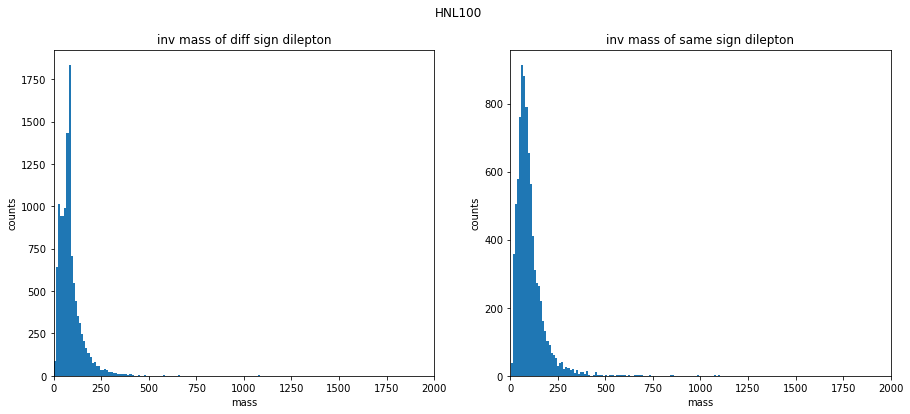

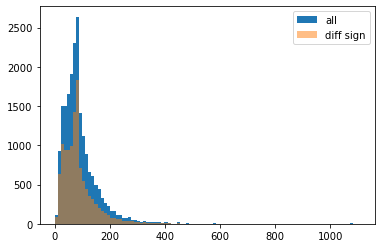

In [51]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from helpers import delta_r, delta_phi, inv_mass_3p, cos_opening_angle, inv_mass, delta_eta
from samples import signal_samples
from helpers import files_from_dir, files_from_dirs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
local_dir = "C:\\Users\\lucas\\Desktop\\PDM\\data\\HeavyNeutrino_trilepton\\HeavyNeutrino_trilepton_M-100_V-0p01_tau_NLO_tauhFilter_TuneCP5_13TeV-madgraph-pythia8"
samples = files_from_dir(local_dir),
i_file = 1
tot_events = 0
overall_mass_same_sign = []
overall_mass_diff_sign = []
overall_mass = []
for file in samples[0]:
    events = NanoEventsFactory.from_root(file, schemaclass=NanoAODSchema).events()
    print(str(i_file)+"/"+str(len(samples[0])))
    i_file = i_file+1
    nb_events = len(events)
    tot_events = tot_events+nb_events
    events['weight'] = events.genWeight
    events['SelElectron'] = events.Electron[(events.Electron.pt > 20.) & (events.Electron.mvaFall17V2Iso_WP90 > 0.5)]
    events['SelMuon'] = events.Muon[(events.Muon.pt > 24.) & (events.Muon.mediumPromptId) & (events.Muon.pfRelIso03_all < 0.2) & (np.abs(events.Muon.dxy) < 0.005)]
    muon1, electron1 = ak.unzip(ak.cartesian([events.SelMuon, events.SelElectron], nested=True))
    match1 = ak.any(muon1.jetIdx == electron1.jetIdx, axis=-1, mask_identity=False)
    events['SelMuon'] = events.SelMuon[(~(match1))]  
    events['SelTau'] = events.Tau[(events.Tau.pt > 20.) & (events.Tau.idDeepTau2017v2p1VSmu > 0.5) & (events.Tau.idDeepTau2017v2p1VSe > 0.5) & (events.Tau.idDeepTau2017v2p1VSjet >=8)]
    tau2, electron2 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match2 = ak.any(tau2.jetIdx == electron2.jetIdx, axis=-1, mask_identity=False)
    tau3, electron3 = ak.unzip(ak.cartesian([events.SelTau, events.SelElectron], nested=True))
    match3 = ak.any(tau3.jetIdx == electron3.jetIdx, axis=-1, mask_identity=False)
    events['SelTau'] = events.SelTau[((~(match2) & ~(match3)) )]
    events = events[ak.num(events.SelElectron)+ak.num(events.SelMuon) + ak.num(events.SelTau) == 3]

    leptons = ak.concatenate([events.SelElectron, events.SelMuon,events.SelTau], axis = -1)

    #ak.sort(leptons, axis = -1)
    pair1_same_sign = leptons[leptons[:,0].charge * leptons[:,1].charge == 1]
    mass1_same_sign = ak.to_numpy((pair1_same_sign[:,0] + pair1_same_sign[:,1]).mass)
    pair1_diff_sign = leptons[leptons[:,0].charge * leptons[:,1].charge == -1]
    mass1_diff_sign =  ak.to_numpy((pair1_diff_sign[:,0] + pair1_diff_sign[:,1]).mass)


    pair2_same_sign = leptons[leptons[:,0].charge * leptons[:,2].charge == 1]
    mass2_same_sign =  ak.to_numpy((pair2_same_sign[:,0] + pair2_same_sign[:,2]).mass)
    pair2_diff_sign = leptons[leptons[:,0].charge * leptons[:,2].charge == 1]
    mass2_diff_sign =  ak.to_numpy((pair2_diff_sign[:,0] + pair2_diff_sign[:,2]).mass)

    pair3_same_sign = leptons[leptons[:,2].charge * leptons[:,1].charge == 1]
    mass3_same_sign =  ak.to_numpy((pair2_same_sign[:,2] + pair2_same_sign[:,1]).mass)
    pair3_diff_sign = leptons[leptons[:,2].charge * leptons[:,1].charge == 1]
    mass3_diff_sign =  ak.to_numpy((pair2_diff_sign[:,2] + pair2_diff_sign[:,1]).mass)

    mass_same_sign = np.concatenate((mass1_same_sign, mass2_same_sign, mass3_same_sign))
    mass_diff_sign = np.concatenate((mass1_diff_sign, mass2_diff_sign, mass3_diff_sign))
    overall_mass_same_sign.extend(mass_same_sign)
    overall_mass_diff_sign.extend(mass_diff_sign)
    overall_mass.extend(mass_diff_sign)
    overall_mass.extend(mass_same_sign)



mn = 0
mx = 2000
nbins = 100
plt.figure(figsize=(15,6))
plt.suptitle("HNL100")
plt.subplot(1, 2, 1)
plt.hist(overall_mass_diff_sign, bins = nbins)
plt.title("inv mass of diff sign dilepton")
plt.xlabel('mass')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.subplot(1, 2, 2)
plt.hist(overall_mass_same_sign, bins = nbins)
plt.title("inv mass of same sign dilepton")
plt.xlabel('mass')
plt.ylabel('counts')
plt.xlim(mn, mx)
plt.show()

plt.hist(overall_mass, bins = nbins,label='all')
plt.hist(overall_mass_diff_sign, bins = nbins,alpha=0.5, label = 'diff sign')
plt.legend()
plt.show()



effect of the charge selection: 11690 / 20200 -> 57.87128712871287% kept, optimality at 30%


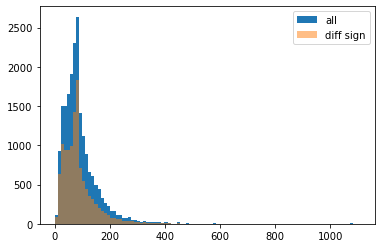

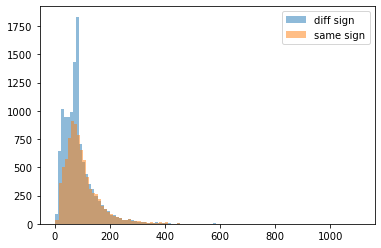

In [52]:
print("effect of the charge selection: " + str(len(overall_mass_diff_sign))+" / " + str(len(overall_mass)) + " -> " + str(100*len(overall_mass_diff_sign)/len(overall_mass))+ "% kept, optimality at 30%"  )

mn = 0
mx = 2000
nbins = 100
plt.hist(overall_mass, bins = nbins,label='all')
plt.hist(overall_mass_diff_sign, bins = nbins,alpha=0.5, label = 'diff sign')
plt.legend()
plt.show()

plt.hist(overall_mass_diff_sign, bins = nbins,alpha = 0.5, label='diff sign')
plt.hist(overall_mass_same_sign, bins = nbins,alpha=0.5, label = 'same sign')
plt.legend()
plt.show()